In [1]:

from sklearn.svm import SVC

from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

from skopt import BayesSearchCV
from skopt.space import Real, Categorical

from data_prep import load_and_preprocess_data
from ROC_gen import ROC_Generator
from conf_matrix import Matrix_Display

    # Train-test split
X_train, X_test, y_train, y_test, X, y = load_and_preprocess_data()


pipe = Pipeline([
        ('smotetomek', SMOTETomek(random_state=42)),
        ('svm', SVC(probability=True, random_state=42))        
])

search_space = {
    'svm__C': Real(0.01, 10, prior='log-uniform'),            # Regularization parameter
    'svm__gamma': Real(0.0001, 1.0, prior='log-uniform'),     # Kernel coefficient
    'svm__kernel': Categorical(['rbf'])                       # Kernel type
}
opt = BayesSearchCV(
    estimator=pipe,
    search_spaces=search_space,
    n_iter=20,                  
    cv=10,
    scoring='f1_macro',         
    n_jobs=-1,
    verbose=1,
    random_state=42
)


In [2]:
opt.fit(X_train, y_train)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

,estimator,Pipeline(step...m_state=42))])
,search_spaces,"{'svm__C': Real(low=0.01...m='normalize'), 'svm__gamma': Real(low=0.00...m='normalize'), 'svm__kernel': Categorical(c...), prior=None)}"
,optimizer_kwargs,None
,n_iter,20
,scoring,'f1_macro'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,10


In [43]:
best_model = opt.best_estimator_


In [35]:
opt.score(X_test, y_test)
#accuracy 

0.7219325686478971

In [36]:
opt.best_score_
#best CV F1

np.float64(0.7120147812793642)

In [37]:
y_pred = best_model.predict(X_test)


In [38]:
y_probs = best_model.predict_proba(X_test)[:, 1]

In [39]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred,
                              target_names=['Bad Credit (0)', 'Good Credit (1)']))

Classification Report:

                 precision    recall  f1-score   support

 Bad Credit (0)       0.61      0.63      0.62        62
Good Credit (1)       0.83      0.82      0.82       138

       accuracy                           0.76       200
      macro avg       0.72      0.72      0.72       200
   weighted avg       0.76      0.76      0.76       200



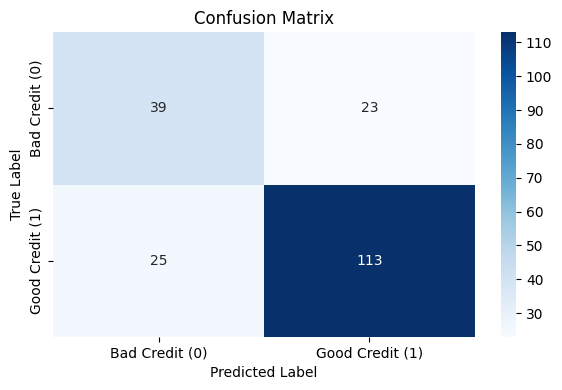

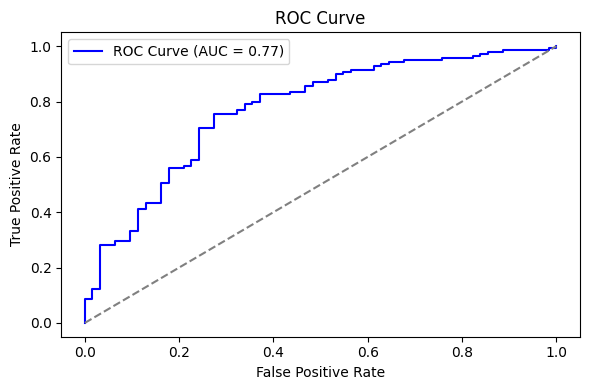

In [40]:
    # Confusion matrix
Matrix_Display(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
ROC_Generator(fpr,tpr,roc_auc)